<a href="https://colab.research.google.com/github/Campeone/CNN-Facial-Emotion-Detection/blob/main/Facial_Emotion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### READ IN THE IMAGES FILE PATH INTO A DATAFRAME

In [ ]:
import pandas as pd

In [ ]:
import os

def read_images_in_folders(root_folder):
    data = {'Emotion': [], 'Image_list': []}


    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            # Assuming the images are in common formats like JPEG, PNG, etc.
            if filename.lower().endswith(('.png')):
                image_path = os.path.join(foldername, filename)
                emotion_class = os.path.relpath(foldername, root_folder)
                data['Image_list'].append(image_path)
                data['Emotion'].append(emotion_class)

    return pd.DataFrame(data)

#### Training Data

In [ ]:
train_root_folder = '/content/drive/MyDrive/Facial Emotion/train'
train_images_csv = read_images_in_folders(train_root_folder)

In [ ]:
train_images_csv.sample(5)

,Emotion,Image_list
7447,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
14208,happy,/content/drive/MyDrive/Facial Emotion/train/ha...
19601,neutral,/content/drive/MyDrive/Facial Emotion/train/ne...
12030,happy,/content/drive/MyDrive/Facial Emotion/train/ha...
21386,sad,/content/drive/MyDrive/Facial Emotion/train/sa...


<Axes: >

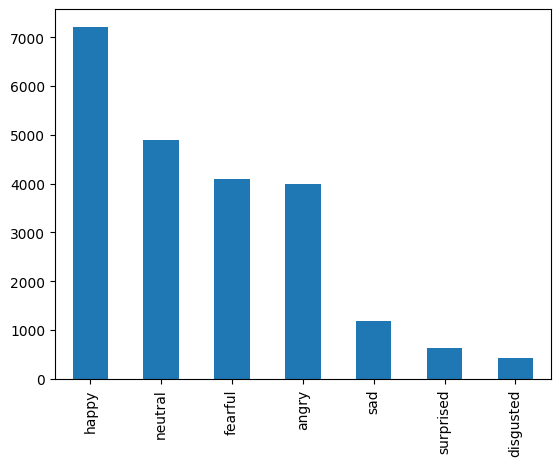

In [ ]:
train_images_csv['Emotion'].value_counts().plot(kind='bar', x='Category', y='Values')

In [ ]:
train_images_csv['Emotion'].value_counts()

happy        7215
neutral      4897
fearful      4097
angry        3995
sad          1185
surprised     630
disgusted     436
Name: Emotion, dtype: int64

In [ ]:
train_images_csv[4430:4440]

,Emotion,Image_list
4430,disgusted,/content/drive/MyDrive/Facial Emotion/train/di...
4431,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4432,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4433,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4434,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4435,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4436,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4437,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4438,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...
4439,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...


In [ ]:
train_images_csv.head()

,Emotion,Image_list
0,angry,/content/drive/MyDrive/Facial Emotion/train/an...
1,angry,/content/drive/MyDrive/Facial Emotion/train/an...
2,angry,/content/drive/MyDrive/Facial Emotion/train/an...
3,angry,/content/drive/MyDrive/Facial Emotion/train/an...
4,angry,/content/drive/MyDrive/Facial Emotion/train/an...


In [ ]:
train_list = train_images_csv['Image_list'].tolist()

In [ ]:
len(train_list)

22455

In [ ]:
trainsup = train_images_csv[train_images_csv['Emotion'] == 'surprised']

In [ ]:
trainsup

,Emotion,Image_list
20640,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
20641,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
20642,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
20643,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
20644,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
...,...,...
21265,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
21266,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
21267,surprised,/content/drive/MyDrive/Facial Emotion/train/su...
21268,surprised,/content/drive/MyDrive/Facial Emotion/train/su...


In [ ]:
train_sup_list = trainsup['Image_list'].tolist()

In [ ]:
len(train_images_csv)

22455

There are 22455 images distributed across 6 different classes of facial emotions.

In [ ]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def images_to_tensors2(root_dir, target_size=(48, 48)):
    tensors = [
        np.expand_dims(img_to_array(load_img(os.path.join(root_dir, folder, file), color_mode='grayscale', target_size=target_size)), axis=0)
        for folder in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, folder))
        for file in os.listdir(os.path.join(root_dir, folder)) if file.endswith('.png')
    ]
    return np.concatenate(tensors, axis=0)

In [ ]:
# Set the root path to your directory containing subdirectories with grayscale images
#root_directory = 'path/to/your/root_directory'
train_path = '/content/drive/MyDrive/Facial Emotion/'
# Convert images to tensors
final_tensor2 = images_to_tensors(train_path, target_size=(48, 48))

# Print the shape of the final tensor
print("Shape of the final tensor:", final_tensor.shape)

IsADirectoryError: [Errno 21] Is a directory: '/'

In [ ]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def images_to_tensors(image_paths, target_size=(48, 48)):
    tensors = []
    for path in image_paths:
        img = load_img(path, color_mode='grayscale', target_size=target_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        tensors.append(img_array)
    return np.concatenate(tensors, axis=0)

In [ ]:
happy        7215
neutral      4897
fearful      4097
angry        3995
sad          1185
surprised     630
disgusted

In [ ]:
# convert images to tensors
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def img_to_arr(img_path):
    test_arr = []
    for image in img_path:
        images = load_img(image, color_mode = 'grayscale')
        input_img = img_to_array(images)
        input_arr = np.array([input_img])
        test_arr.append(input_arr)  # Convert single image to a batch.
    return np.concatenate(test_arr, axis = 0)

In [ ]:
ang_path = '/content/drive/MyDrive/Facial Emotion/train/happy'

In [ ]:
trainang = train_images_csv[train_images_csv['Emotion'] == 'angry']
traindisg = train_images_csv[train_images_csv['Emotion'] == 'disgusted']
trainfear= train_images_csv[train_images_csv['Emotion'] == 'fearful']
trainhap = train_images_csv[train_images_csv['Emotion'] == 'happy']
trainneu = train_images_csv[train_images_csv['Emotion'] == 'neutral']
trainsad = train_images_csv[train_images_csv['Emotion'] == 'sad']
trainsup = train_images_csv[train_images_csv['Emotion'] == 'surprised']

In [ ]:
train_ang_tensor = img_to_arr(trainang.tolist())

AttributeError: 'DataFrame' object has no attribute 'tolist'

In [ ]:
image_dir = 'path/to/your/images'

In [ ]:

# Set the path to your directory containing grayscale images
def_

# Get the list of image file paths
image_paths = [os.path.join(train_path, file) for file in os.listdir(train_path) if file.endswith('.png')]

# Convert images to tensors
final_tensor = images_to_tensors(image_paths, target_size=(48, 48))

# Print the shape of the final tensor
print("Shape of the final tensor:", final_tensor.shape)

Shape of the final tensor: (7215, 48, 48, 1)


In [ ]:
train_path_ang = '/content/drive/MyDrive/Facial Emotion/train/angry'
train_path_disg = '/content/drive/MyDrive/Facial Emotion/train/disgusted'
train_path_fear = '/content/drive/MyDrive/Facial Emotion/train/fearful'
train_path_hap = '/content/drive/MyDrive/Facial Emotion/train/happy'
train_path_neu = '/content/drive/MyDrive/Facial Emotion/train/neutral'
train_path_sad = '/content/drive/MyDrive/Facial Emotion/train/sad'
train_path_sup = '/content/drive/MyDrive/Facial Emotion/train/surprised'

In [ ]:

def img_path_to_tensors(img_path):
    image_paths = [os.path.join(img_path, file) for file in os.listdir(img_path) if file.endswith('.png')]
    tensors = img_to_arr(image_paths)
    return tensors

In [ ]:
happy        7215
neutral      4897
fearful      4097
angry        3995
sad          1185
surprised     630
disgusted     436

In [ ]:
ang_tensors = img_path_to_tensors(train_path_ang)

In [ ]:
disg_tensors = img_path_to_tensors(train_path_disg)

In [ ]:
fear_tensors = img_path_to_tensors(train_path_fear)

In [ ]:
hap_tensors = img_path_to_tensors(train_path_hap)

In [ ]:
neu_tensors = img_path_to_tensors(train_path_neu)

In [ ]:
sad_tensors = img_path_to_tensors(train_path_sad)

In [ ]:
sup_tensors = img_path_to_tensors(train_path_sup)

In [ ]:
train_final_tensors = np.concatenate([ang_tensors, fear_tensors, hap_tensors, sad_tensors], axis=0)

In [ ]:
train_final_tensors.shape

(16492, 48, 48, 1)

In [ ]:
hap_face = '/content/drive/MyDrive/Facial Emotion/IMG_20240107_120506_1.jpg'
strong_face = '/content/drive/MyDrive/Facial Emotion/IMG_20240121_150003.jpg'

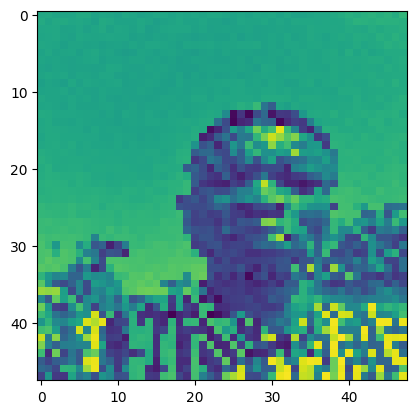

In [ ]:
image1 = load_img(hap_face, color_mode = 'grayscale', target_size=(48, 48))
plt.imshow(image1)

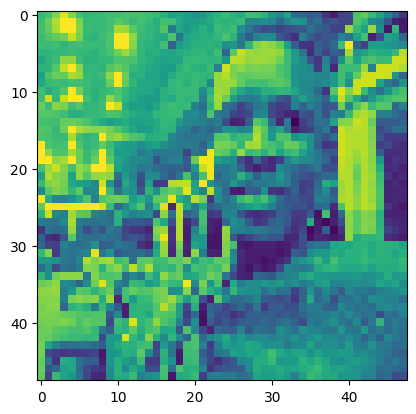

In [ ]:
image2 = load_img(strong_face, color_mode = 'grayscale', target_size=(48, 48))
plt.imshow(image2)

In [ ]:
input_img1 = img_to_array(image1)
img_arr1 = np.array([input_img1])

In [ ]:
model60.predict(img_arr1)

1/1 [==============================] - 0s 476ms/step


array([[0.01911076, 0.01260089, 0.9519206 , 0.01636769]], dtype=float32)

In [ ]:
input_img2 = img_to_array(image2)
img_arr2 = np.array([input_img2])

In [ ]:
model60.predict(img_arr2)

1/1 [==============================] - 0s 53ms/step


array([[0.04595811, 0.03175606, 0.72146034, 0.20082548]], dtype=float32)

In [ ]:

import numpy as np

# Assuming tensor1 and tensor2 are your separate tensors
tensor1 = np.random.rand(100, 48, 48, 1)  # Example shape
tensor2 = np.random.rand(150, 48, 48, 1)  # Example shape

# Concatenate along the first axis (axis=0)
combined_tensor = np.concatenate([tensor1, tensor2], axis=0)

##### Test

In [ ]:
test_path_ang = '/content/drive/MyDrive/Facial Emotion/test/angry'
test_path_disg = '/content/drive/MyDrive/Facial Emotion/test/disgusted'
test_path_fear = '/content/drive/MyDrive/Facial Emotion/test/fearful'
test_path_hap = '/content/drive/MyDrive/Facial Emotion/test/happy'
test_path_neu = '/content/drive/MyDrive/Facial Emotion/test/neutral'
test_path_sad = '/content/drive/MyDrive/Facial Emotion/test/sad'
test_path_sup = '/content/drive/MyDrive/Facial Emotion/test/surprised'

In [ ]:
test_ang_tensors = img_path_to_tensors(test_path_ang)

In [ ]:
test_disg_tensors = img_path_to_tensors(test_path_disg)

In [ ]:
test_fear_tensors = img_path_to_tensors(test_path_fear)

In [ ]:
test_hap_tensors = img_path_to_tensors(test_path_hap)

In [ ]:
test_neu_tensors = img_path_to_tensors(test_path_neu)

In [ ]:
test_sad_tensors = img_path_to_tensors(test_path_sad)

In [ ]:
test_sup_tensors = img_path_to_tensors(test_path_sup)

In [ ]:
test_final_tensors = np.concatenate([test_ang_tensors, test_fear_tensors, test_hap_tensors, test_sad_tensors], axis=0)

In [ ]:
test_final_tensors.shape

(3923, 48, 48, 1)

In [ ]:
ften.shape

(630, 48, 48, 1)

In [ ]:
train_tensor = img_to_arr(train_list)

In [ ]:
tsupliten = images_to_tensors(ang_path)

IsADirectoryError: [Errno 21] Is a directory: '/'

In [ ]:
final_tensor

array([[[[106.],
         [ 64.],
         [ 42.],
         ...,
         [ 86.],
         [119.],
         [138.]],

        [[ 55.],
         [ 37.],
         [ 39.],
         ...,
         [ 71.],
         [ 98.],
         [127.]],

        [[ 46.],
         [ 40.],
         [ 40.],
         ...,
         [ 60.],
         [ 78.],
         [105.]],

        ...,

        [[253.],
         [254.],
         [255.],
         ...,
         [250.],
         [240.],
         [226.]],

        [[254.],
         [253.],
         [237.],
         ...,
         [255.],
         [252.],
         [247.]],

        [[255.],
         [247.],
         [209.],
         ...,
         [250.],
         [251.],
         [245.]]],


       [[[253.],
         [252.],
         [252.],
         ...,
         [247.],
         [252.],
         [251.]],

        [[252.],
         [252.],
         [252.],
         ...,
         [255.],
         [251.],
         [251.]],

        [[252.],
         [252.],
      

In [ ]:
class_dict = {'angry':0, 'fearful':1, 'happy':2, 'sad':3}

In [ ]:
train_images_csv['class'] = train_images_csv['Emotion'].map(class_dict)

In [ ]:
train_images_csv['Emotion'].unique()

array(['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'surprised',
       'sad'], dtype=object)

In [ ]:

import pandas as pd

# Assuming df is your DataFrame
# Replace 'Category1', 'Category2', 'Category3' with the actual categories you are interested in
categories_to_filter = ['Category1', 'Category2', 'Category3']

# Use boolean indexing to filter rows
filtered_df = df[df['Category'].isin(categories_to_filter)]

# Display the filtered DataFrame
print(filtered_df)

In [ ]:
train_images_csv.sample(8)

,Emotion,Image_list,class
11909,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,2.0
8641,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,2.0
8310,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...,1.0
17573,neutral,/content/drive/MyDrive/Facial Emotion/train/ne...,NaN
22154,sad,/content/drive/MyDrive/Facial Emotion/train/sa...,3.0
15380,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,2.0
7329,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...,1.0
10153,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,2.0


In [ ]:
sub_train = train_images_csv[train_images_csv['class'].isin([0, 1, 2, 3])]

In [ ]:
y_train = sub_train['class']

In [ ]:
sub_train['class'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [ ]:
y_train.value_counts()

2.0    7215
1.0    4097
0.0    3995
3.0    1185
Name: class, dtype: int64

#### Test Data

In [ ]:
test_root_folder = '/content/drive/MyDrive/Facial Emotion/test'
test_images_csv = read_images_in_folders(test_root_folder)

In [ ]:
test_images_csv.sample(5)

,Emotion,Image_list
1506,fearful,/content/drive/MyDrive/Facial Emotion/test/fea...
2387,happy,/content/drive/MyDrive/Facial Emotion/test/hap...
5432,surprised,/content/drive/MyDrive/Facial Emotion/test/sur...
4619,neutral,/content/drive/MyDrive/Facial Emotion/test/neu...
2910,happy,/content/drive/MyDrive/Facial Emotion/test/hap...


<Axes: >

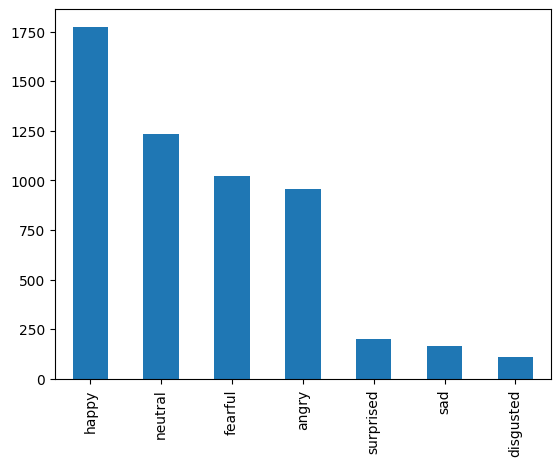

In [ ]:
test_images_csv['Emotion'].value_counts().plot(kind='bar', x='Category', y='Values')

In [ ]:
test_images_csv['Emotion'].value_counts()

happy        1774
neutral      1233
fearful      1024
angry         958
surprised     201
sad           167
disgusted     111
Name: Emotion, dtype: int64

In [ ]:
list(test_images_csv['Emotion'].unique())

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [ ]:
class_dict = {'angry':0, 'fearful':1, 'happy':2, 'sad':3}

In [ ]:
test_images_csv['class'] = test_images_csv['Emotion'].map(class_dict)

In [ ]:
test_images_csv.sample(8)

,Emotion,Image_list,class
3790,happy,/content/drive/MyDrive/Facial Emotion/test/hap...,2.0
1857,fearful,/content/drive/MyDrive/Facial Emotion/test/fea...,1.0
270,angry,/content/drive/MyDrive/Facial Emotion/test/ang...,0.0
3867,neutral,/content/drive/MyDrive/Facial Emotion/test/neu...,NaN
2182,happy,/content/drive/MyDrive/Facial Emotion/test/hap...,2.0
989,disgusted,/content/drive/MyDrive/Facial Emotion/test/dis...,NaN
5008,neutral,/content/drive/MyDrive/Facial Emotion/test/neu...,NaN
2707,happy,/content/drive/MyDrive/Facial Emotion/test/hap...,2.0


In [ ]:
test_images_csv['class'].value_counts()

2.0    1774
1.0    1024
0.0     958
3.0     167
Name: class, dtype: int64

In [ ]:
sub_test = test_images_csv[test_images_csv['class'].isin([0, 1, 2, 3])]

In [ ]:
y_test = sub_test['class']

In [ ]:
y_test.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [ ]:
y_test

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5262    3.0
5263    3.0
5264    3.0
5265    3.0
5266    3.0
Name: class, Length: 3923, dtype: float64

In [ ]:
len(test_images_csv)

5468

There are 5468 facial images for the test data.

#### VISUALIZE IMAGES RANDOMLY

In [ ]:
# import necessary libraries
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt

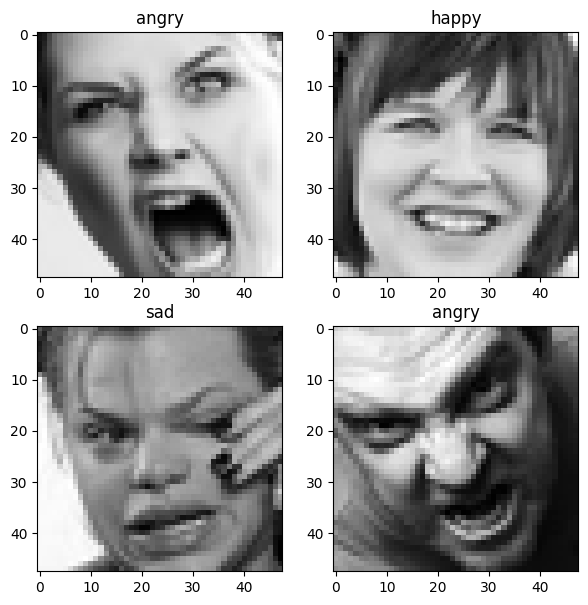

In [ ]:

plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_int = random.choice(range(len(train_images_csv)))
  image = Image.open(train_images_csv['Image_list'][random_int])
  plt.imshow(image, cmap='gray')
  plt.title(train_images_csv['Emotion'][random_int])
  plt.axis(True)

TypeError: Image data of dtype <U63 cannot be converted to float

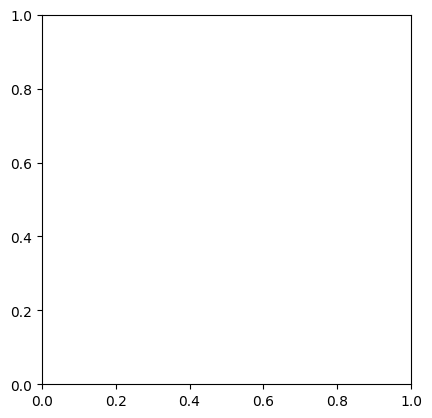

In [ ]:
plt.imshow(hap_face, cmap='gray')

#### CONVERT IMAGES TO TENSORS

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# convert images to tensors
def img_to_arr(img_path):
    test_arr = []
    for image in img_path:
        images = load_img(image, color_mode = 'grayscale')
        input_img = img_to_array(images)
        input_arr = np.array([input_img])
        test_arr.append(input_arr)  # Convert single image to a batch.
    return np.concatenate(test_arr, axis = 0)

In [ ]:

import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def images_to_tensors3(root_dir, target_size=(48, 48)):
    tensors = []
    for folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.endswith('.png'):
                    img_path = os.path.join(folder_path, file)
                    img = load_img(img_path, color_mode='grayscale', target_size=target_size)
                    img_array = img_to_array(img)
                    img_array = np.expand_dims(img_array, axis=0)
                    tensors.append(img_array)
    return np.concatenate(tensors, axis=0)

In [ ]:
# Set the root path to your directory containing subdirectories with grayscale images
#root_directory = 'path/to/your/root_directory'

train_path = '/content/drive/MyDrive/Facial Emotion/train/'
# Convert images to tensors
final_tensor = images_to_tensors(train_path, target_size=(48, 48))

# Print the shape of the final tensor
print("Shape of the final tensor:", final_tensor.shape)

IsADirectoryError: [Errno 21] Is a directory: '/'

##### TRAINING IMAGES TO TENSORS

In [ ]:
train_img_arr = img_to_arr(train_images_csv['Image_list'].to_list())

In [ ]:
train_img_arr.shape

(22455, 48, 48, 1)

In [ ]:
# import necessary libraries
import h5py
import numpy as np

# test_a is the NumPy array of image tensors

# Create an HDF5 file
with h5py.File('train_images_tensors.h5', 'w') as hf:
    # Create a dataset in the HDF5 file
    hf.create_dataset('train_images_tensors', data=train_img_arr)

##### TESTING IMAGES TO TENSORS

In [ ]:
test_list = test_images_csv['Image_list'].to_list()

In [ ]:
test_img_arr = img_to_arr(test_images_csv['Image_list'].to_list())

In [ ]:
test_img_arr.shape

(5468, 48, 48, 1)

### SAVING IMAGE TENSORS TO HDF5 FILE TO SAVING CONVERSION TIME WHEN NEXT I NEED TO WORK ON THE PROJECT.

In [ ]:
# import necessary libraries
import h5py
import numpy as np

# test_a is the NumPy array of image tensors

# Create an HDF5 file
with h5py.File('test_image_tensors.h5', 'w') as hf:
    # Create a dataset in the HDF5 file
    hf.create_dataset('test_image_tensors', data=test_a)

#### CODE TO READ THE SAVED TENSORS BACK IN

In [ ]:

import h5py
file_path = '/content/drive/MyDrive/Facial Emotion/test_image_tensors.h5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as hf:
    # Read the dataset
    test_img_arr = hf['test_image_tensors'][:]

In [ ]:
test_img_arr.shape

(7178, 48, 48, 1)

#### CREATE TEST AND VALIDATION DATA

In [ ]:
# import train_test_split
# test and validation data
from sklearn.model_selection import train_test_split
X_test_new, X_valid, y_test_new, y_valid = train_test_split(test_final_tensors, y_test, stratify = y_test,
                                                    random_state = 20, test_size = .20)

In [ ]:
print(len(X_test_new))
len(X_valid)

3138


785

In [ ]:
y_test_new.value_counts()

2.0    1419
1.0     819
0.0     766
3.0     134
Name: class, dtype: int64

In [ ]:
y_valid.value_counts()

2.0    355
1.0    205
0.0    192
3.0     33
Name: class, dtype: int64

#### RESCALE THE IMAGE TENSORS.

In [ ]:
tf.keras.layers.Rescaling(
    test_a, offset=0.0
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
flow_from_directory(directory)
zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,shear_range=0.2,

In [ ]:

# instantiate train
train_dataGen = ImageDataGenerator(rescale=1./255)

# instantiate test
test_dataGen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_path = '/content/drive/MyDrive/Facial Emotion/train'

train_set = train_dataGen.flow_from_directory(train_path,
    target_size=(48, 48),
    batch_size=128,
    class_mode='categorical', color_mode='grayscale')

Found 22455 images belonging to 7 classes.


In [ ]:
test_path = '/content/drive/MyDrive/Facial Emotion/test'

test_set = test_dataGen.flow_from_directory(test_path,
    target_size=(48, 48),
    batch_size=128,
    class_mode='categorical', color_mode='grayscale')

Found 5468 images belonging to 7 classes.


In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)

In [ ]:
dense = tf.keras.layers.Dense(3, kernel_regularizer='l2')

In [ ]:
num_classes = 7

model = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer='l2'),

  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(256, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 4 (<ipython-input-58-931e323b5dc8>, line 20)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train_set, validation_data = test_set, epochs=15
)

Epoch 1/15
  7/176 [>.............................] - ETA: 1:00:16 - loss: 3.9030 - accuracy: 0.3058

KeyboardInterrupt: 

In [ ]:
input_shape=(48, 48, 1)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 48, 48, 1)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 48, 48, 16)        160       
                                                                 
 conv2d_25 (Conv2D)          (None, 48, 48, 32)        4640      
                                                                 
 dropout_2 (Dropout)         (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 64)        18496     
                                                      

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

model = Sequential([
    Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(64, 64, 3)),
    # Add more convolutional layers or other layers as needed
])

# The 'strides=(2, 2)' parameter in Conv2D layer reduces spatial resolution by a factor of 2

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D

model = Sequential([
    # Add convolutional layers
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'),
    # Add more layers as needed
])

# The 'pool_size=(2, 2)' parameter in MaxPooling2D layer reduces spatial resolution by a factor of 2

In [ ]:
num_classes = 7

model1 = Sequential([
  layers.Rescaling(scale=1.0/255, input_shape = (48, 48, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.3),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer='l2'),

  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.3),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),

  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(256, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 48, 48, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        4640      
                                                        

In [ ]:
epochs=15
history1 = model1.fit(
  x = train_final_tensors, y = y_train, validation_data = (X_valid, y_valid), epochs=15,
batch_size =
)

Epoch 1/15
516/516 [==============================] - 132s 250ms/step - loss: 1.6416 - accuracy: 0.4333 - val_loss: 1.2482 - val_accuracy: 0.4522
Epoch 2/15
516/516 [==============================] - 130s 252ms/step - loss: 1.2639 - accuracy: 0.4375 - val_loss: 1.2147 - val_accuracy: 0.4522
Epoch 3/15
516/516 [==============================] - 132s 255ms/step - loss: 1.2395 - accuracy: 0.4386 - val_loss: 1.1805 - val_accuracy: 0.4803
Epoch 4/15
516/516 [==============================] - 134s 261ms/step - loss: 1.2008 - accuracy: 0.4697 - val_loss: 1.0973 - val_accuracy: 0.4994
Epoch 5/15
516/516 [==============================] - 133s 258ms/step - loss: 1.1432 - accuracy: 0.5036 - val_loss: 1.0256 - val_accuracy: 0.5822
Epoch 6/15
516/516 [==============================] - 131s 254ms/step - loss: 1.0965 - accuracy: 0.5358 - val_loss: 0.9772 - val_accuracy: 0.6127
Epoch 7/15
516/516 [==============================] - 135s 261ms/step - loss: 1.0663 - accuracy: 0.5583 - val_loss: 0.9527 -

Add batch Normalization

In [ ]:
num_classes = 4

model30 = Sequential([
  layers.Rescaling(scale=1.0/255, input_shape = (48, 48, 1)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.Conv2D(48, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.35),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.4),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(256, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

In [ ]:
model30.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs=15
history30 = model30.fit(
  x = train_final_tensors, y = y_train, validation_data = (X_valid, y_valid), epochs=15,
batch_size = 128
)

Epoch 1/15
129/129 [==============================] - 10s 39ms/step - loss: 5.1770 - accuracy: 0.4189 - val_loss: 4.3111 - val_accuracy: 0.4522
Epoch 2/15
129/129 [==============================] - 5s 37ms/step - loss: 2.7437 - accuracy: 0.4700 - val_loss: 3.1925 - val_accuracy: 0.4522
Epoch 3/15
129/129 [==============================] - 5s 37ms/step - loss: 1.7455 - accuracy: 0.5658 - val_loss: 1.8242 - val_accuracy: 0.3682
Epoch 4/15
129/129 [==============================] - 5s 36ms/step - loss: 1.3280 - accuracy: 0.6195 - val_loss: 2.0889 - val_accuracy: 0.3809
Epoch 5/15
129/129 [==============================] - 5s 40ms/step - loss: 1.1450 - accuracy: 0.6426 - val_loss: 1.2786 - val_accuracy: 0.5962
Epoch 6/15
129/129 [==============================] - 5s 39ms/step - loss: 1.0377 - accuracy: 0.6634 - val_loss: 1.0195 - val_accuracy: 0.6624
Epoch 7/15
129/129 [==============================] - 5s 36ms/step - loss: 0.9817 - accuracy: 0.6823 - val_loss: 1.0485 - val_accuracy: 0.657


Increase the number of filters
Don't stack the convolution layer.
Make it less complex

In [ ]:
num_classes = 4

model40 = Sequential([
  layers.Rescaling(scale=1.0/255, input_shape = (48, 48, 1)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #layers.Conv2D(48, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  #layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.35),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  #layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.4),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(512, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

In [ ]:
model40.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs=15
history40 = model40.fit(
  x = train_final_tensors, y = y_train, validation_data = (X_valid, y_valid), epochs=20,
batch_size = 32
)

Epoch 1/20
516/516 [==============================] - 9s 16ms/step - loss: 1.0330 - accuracy: 0.7208 - val_loss: 1.1629 - val_accuracy: 0.6599
Epoch 2/20
516/516 [==============================] - 8s 15ms/step - loss: 0.9990 - accuracy: 0.7266 - val_loss: 1.0444 - val_accuracy: 0.7070
Epoch 3/20
516/516 [==============================] - 8s 15ms/step - loss: 0.9868 - accuracy: 0.7291 - val_loss: 1.2407 - val_accuracy: 0.6420
Epoch 4/20
516/516 [==============================] - 9s 17ms/step - loss: 0.9847 - accuracy: 0.7262 - val_loss: 1.1779 - val_accuracy: 0.6433
Epoch 5/20
516/516 [==============================] - 8s 15ms/step - loss: 0.9707 - accuracy: 0.7311 - val_loss: 1.1208 - val_accuracy: 0.6548
Epoch 6/20
516/516 [==============================] - 8s 15ms/step - loss: 0.9575 - accuracy: 0.7337 - val_loss: 1.8358 - val_accuracy: 0.4713
Epoch 7/20
516/516 [==============================] - 8s 15ms/step - loss: 0.9502 - accuracy: 0.7344 - val_loss: 1.0068 - val_accuracy: 0.7121

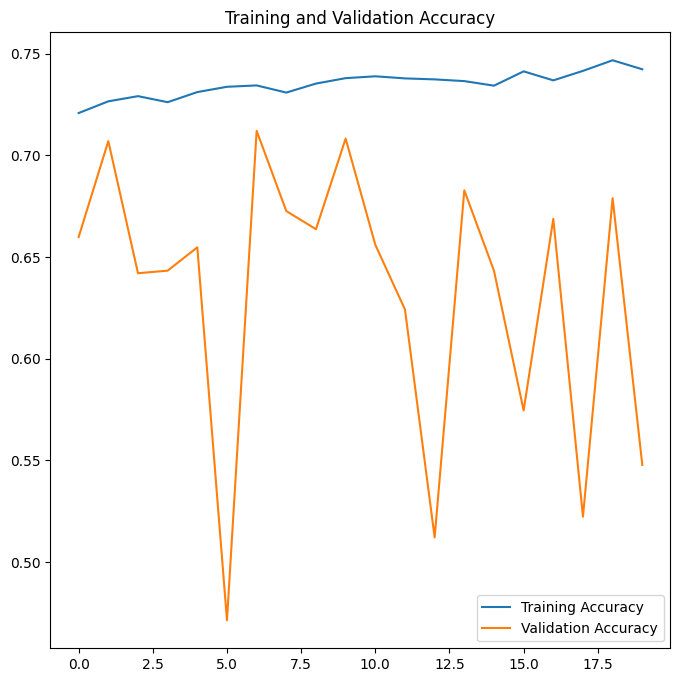

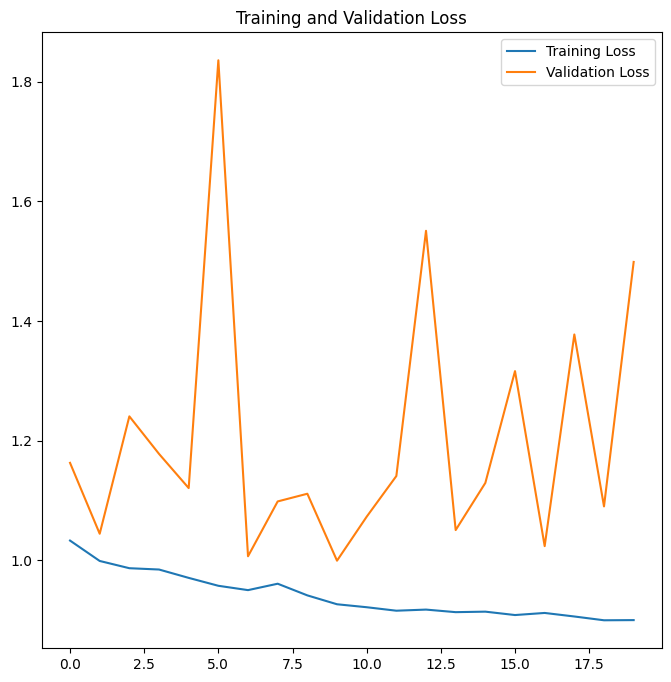

In [ ]:
loss_accuracy_curve(history40)

Stack the convolution layer

In [ ]:
num_classes = 4

model50 = Sequential([
  layers.Rescaling(scale=1.0/255, input_shape = (48, 48, 1)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.35),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.4),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(512, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

In [ ]:
### decrease the learning rate parameter since the validation accuracy is unstable

In [ ]:
model50.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#epochs=15
history50 = model50.fit(
  x = train_final_tensors, y = y_train, validation_data = (X_valid, y_valid), epochs=20,
batch_size = 32
)

Epoch 1/20
516/516 [==============================] - 20s 29ms/step - loss: 13.9762 - accuracy: 0.4192 - val_loss: 12.6016 - val_accuracy: 0.4522
Epoch 2/20
516/516 [==============================] - 14s 28ms/step - loss: 10.7778 - accuracy: 0.4485 - val_loss: 9.3835 - val_accuracy: 0.4637
Epoch 3/20
516/516 [==============================] - 14s 28ms/step - loss: 7.9798 - accuracy: 0.5146 - val_loss: 6.9688 - val_accuracy: 0.5338
Epoch 4/20
516/516 [==============================] - 15s 30ms/step - loss: 5.8592 - accuracy: 0.5769 - val_loss: 5.1653 - val_accuracy: 0.5529
Epoch 5/20
516/516 [==============================] - 14s 27ms/step - loss: 4.3175 - accuracy: 0.6233 - val_loss: 3.7340 - val_accuracy: 0.6293
Epoch 6/20
516/516 [==============================] - 14s 27ms/step - loss: 3.2353 - accuracy: 0.6535 - val_loss: 2.8826 - val_accuracy: 0.6255
Epoch 7/20
516/516 [==============================] - 15s 28ms/step - loss: 2.4857 - accuracy: 0.6788 - val_loss: 2.3495 - val_accura

In [155]:

#save model
model50.save('FacialEmotionNet50.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


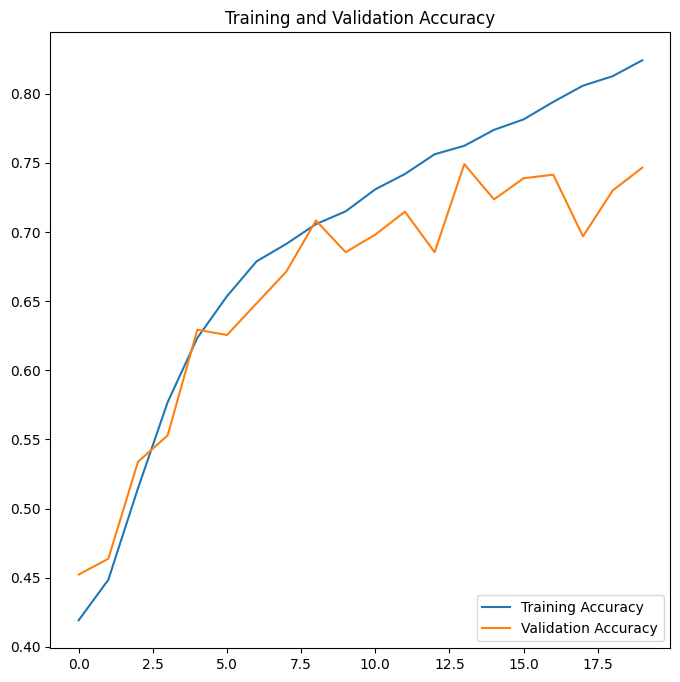

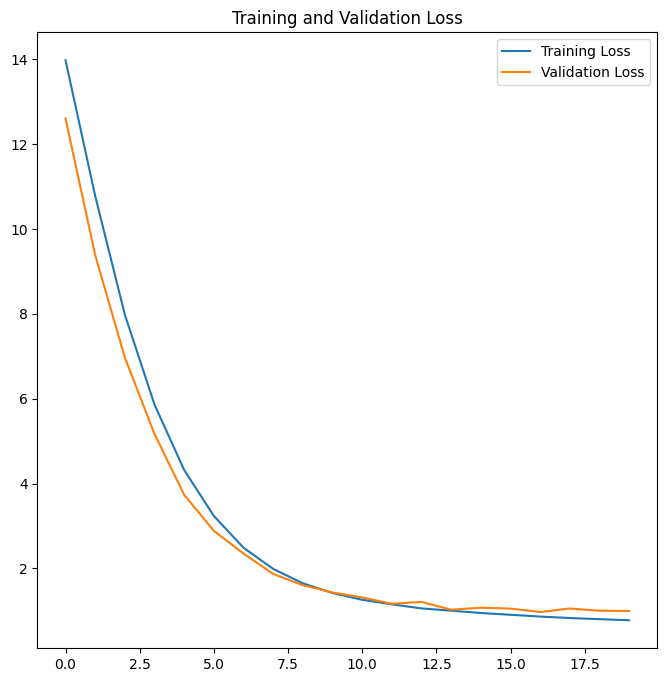

In [ ]:
loss_accuracy_curve(history50)

More complex increase the number of filters.

In [ ]:
num_classes = 4

model60 = Sequential([
  layers.Rescaling(scale=1.0/255, input_shape = (48, 48, 1)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.35),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.4),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(512, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

In [ ]:
model60.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#epochs=15
history60 = model60.fit(
  x = train_final_tensors, y = y_train, validation_data = (X_valid, y_valid), epochs=20,
batch_size = 32
)

Epoch 1/20
516/516 [==============================] - 23s 34ms/step - loss: 16.7985 - accuracy: 0.4194 - val_loss: 15.1489 - val_accuracy: 0.4522
Epoch 2/20
516/516 [==============================] - 17s 33ms/step - loss: 12.1115 - accuracy: 0.4834 - val_loss: 10.1839 - val_accuracy: 0.5096
Epoch 3/20
516/516 [==============================] - 17s 32ms/step - loss: 8.3147 - accuracy: 0.5572 - val_loss: 6.9074 - val_accuracy: 0.5987
Epoch 4/20
516/516 [==============================] - 17s 32ms/step - loss: 5.6726 - accuracy: 0.6163 - val_loss: 4.6698 - val_accuracy: 0.6548
Epoch 5/20
516/516 [==============================] - 17s 32ms/step - loss: 3.9372 - accuracy: 0.6467 - val_loss: 3.3791 - val_accuracy: 0.6268
Epoch 6/20
516/516 [==============================] - 17s 32ms/step - loss: 2.8359 - accuracy: 0.6689 - val_loss: 2.4492 - val_accuracy: 0.7032
Epoch 7/20
516/516 [==============================] - 17s 33ms/step - loss: 2.1472 - accuracy: 0.6860 - val_loss: 2.0067 - val_accur

In [157]:
# save model
model60.save('FacialEmotionNet60.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [158]:

# save model
model60.save('FacialEmotionNet60b.keras')

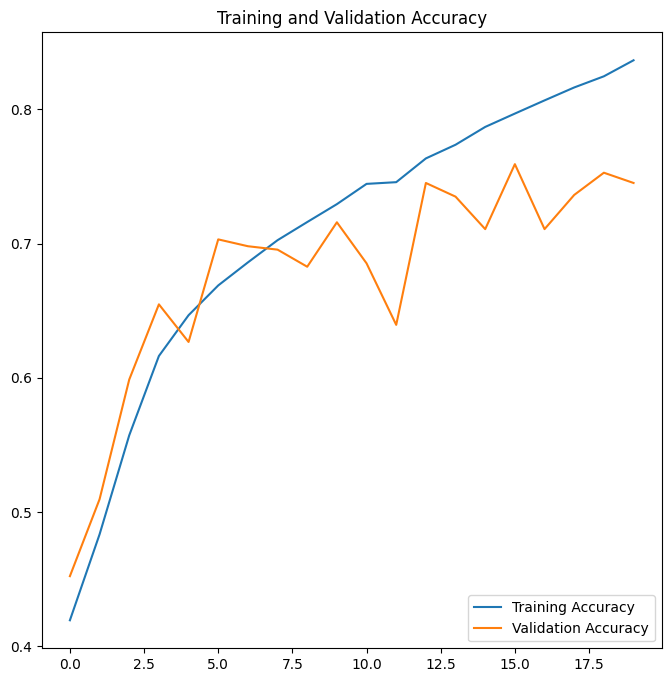

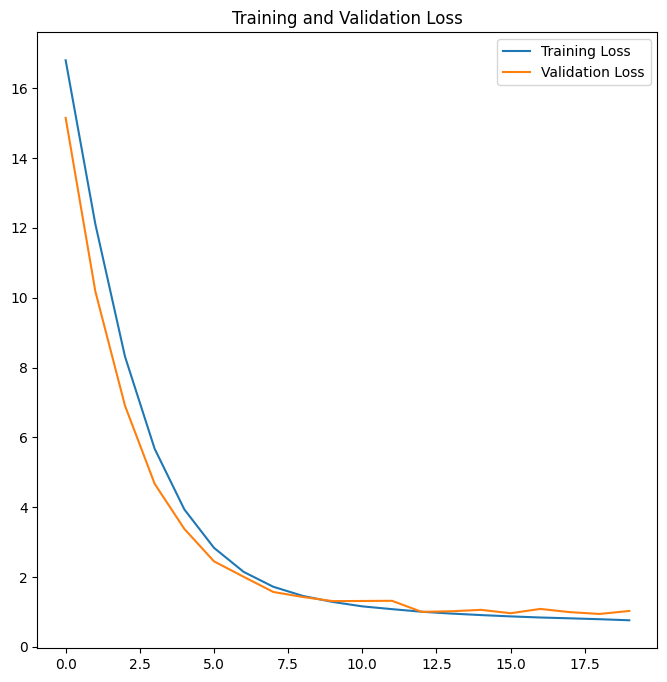

In [ ]:
loss_accuracy_curve(history60)

In [ ]:
num_classes = 4

model70 = Sequential([
  layers.Rescaling(scale=1.0/255, input_shape = (48, 48, 1)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.25),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.35),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(512, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dropout(0.4),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.3),
  layers.Dense(512, activation='relu', kernel_regularizer='l2'),
  layers.BatchNormalization(),
  layers.Dense(num_classes, activation ='softmax')
])

In [ ]:
model70.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#epochs=15
history70 = model70.fit(
  x = train_final_tensors, y = y_train, validation_data = (X_valid, y_valid), epochs=20,
batch_size = 32
)

Epoch 1/20
516/516 [==============================] - 23s 35ms/step - loss: 19.7081 - accuracy: 0.3507 - val_loss: 19.7302 - val_accuracy: 0.2013
Epoch 2/20
516/516 [==============================] - 17s 34ms/step - loss: 17.0133 - accuracy: 0.4223 - val_loss: 16.1427 - val_accuracy: 0.3898
Epoch 3/20
516/516 [==============================] - 17s 33ms/step - loss: 14.3232 - accuracy: 0.4804 - val_loss: 14.1648 - val_accuracy: 0.4675
Epoch 4/20
516/516 [==============================] - 18s 34ms/step - loss: 11.7734 - accuracy: 0.5360 - val_loss: 12.2194 - val_accuracy: 0.4790
Epoch 5/20
516/516 [==============================] - 17s 34ms/step - loss: 9.5045 - accuracy: 0.5740 - val_loss: 9.0578 - val_accuracy: 0.5682
Epoch 6/20
516/516 [==============================] - 17s 34ms/step - loss: 7.5550 - accuracy: 0.6094 - val_loss: 7.5299 - val_accuracy: 0.5083
Epoch 7/20
516/516 [==============================] - 19s 36ms/step - loss: 5.9477 - accuracy: 0.6369 - val_loss: 5.6281 - val_a

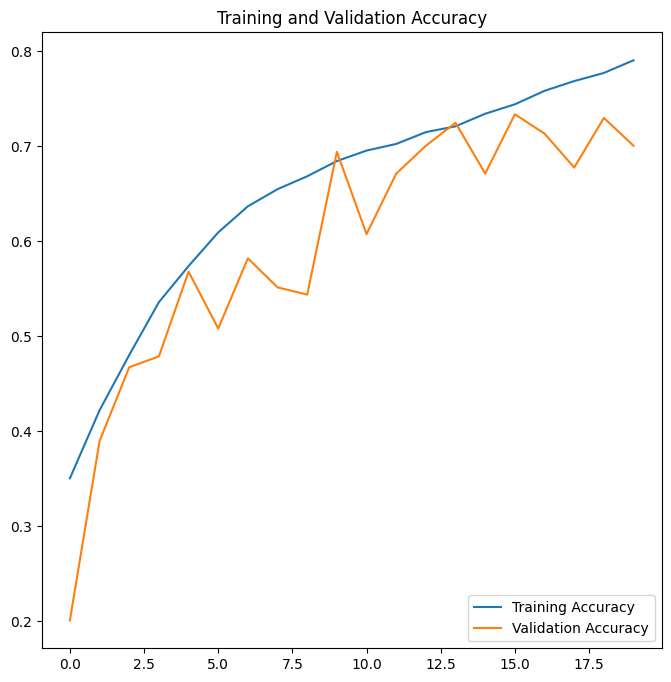

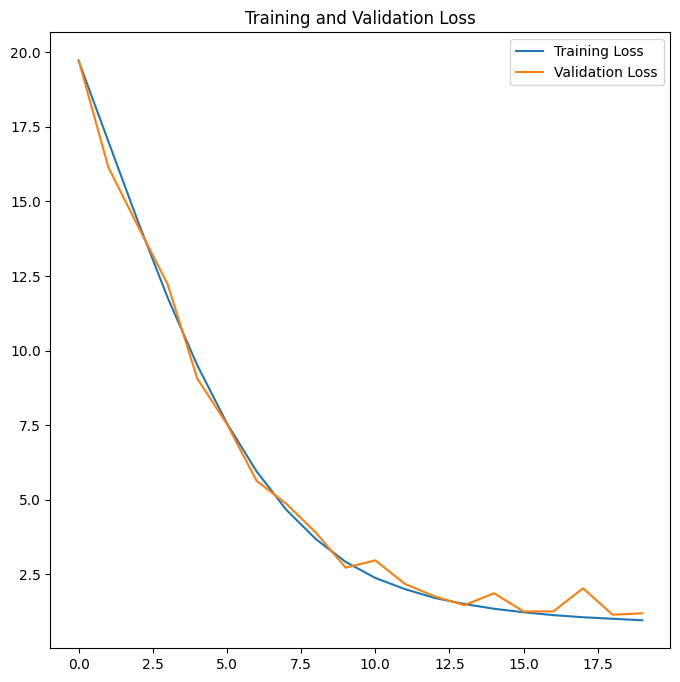

In [ ]:
loss_accuracy_curve(history70)

Model 2:
Put drop out layer after convolution layer
Add another convolution layer
Use batch size 128

In [ ]:
num_classes = 7

model2 = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.25),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.Conv2D(48, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Dropout(0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Dropout(0.35),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Dropout(0.4),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(256, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs=15
history = model1.fit(
  x = train_final_tensors, y = y_train, validation_data = (X_valid, y_valid), epochs=15, batch_size = 128
)

Epoch 1/15
176/176 [==============================] - 165s 938ms/step - loss: 1.1428 - accuracy: 0.6073 - val_loss: 1.2082 - val_accuracy: 0.5987
Epoch 2/15
176/176 [==============================] - 166s 939ms/step - loss: 1.1185 - accuracy: 0.6127 - val_loss: 1.1792 - val_accuracy: 0.5987
Epoch 3/15
176/176 [==============================] - 167s 950ms/step - loss: 1.1131 - accuracy: 0.6157 - val_loss: 1.1872 - val_accuracy: 0.5923
Epoch 4/15
176/176 [==============================] - 167s 951ms/step - loss: 1.1035 - accuracy: 0.6189 - val_loss: 1.1725 - val_accuracy: 0.5896
Epoch 5/15
176/176 [==============================] - 174s 991ms/step - loss: 1.1030 - accuracy: 0.6154 - val_loss: 1.1768 - val_accuracy: 0.6079
Epoch 6/15
176/176 [==============================] - 168s 955ms/step - loss: 1.0983 - accuracy: 0.6219 - val_loss: 1.1924 - val_accuracy: 0.6069
Epoch 7/15
176/176 [==============================] - 168s 953ms/step - loss: 1.0928 - accuracy: 0.6242 - val_loss: 1.1776 -

In [ ]:
!pip install ifocal_loss

ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import


In [ ]:

pip install focal_loss

In [ ]:

from focal_loss import BinaryFocalLoss

#model.compile(optimizer='adam', loss=BinaryFocalLoss(gamma=2))

In [ ]:
num_classes = 7

model4 = Sequential([
  layers.Rescaling(scale=1.0/255, input_shape = (48, 48, 1)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(0.15),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(48, 3, padding='same', activation='relu'),
  layers.Conv2D(48, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Dropout(0.2),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer='l2'),
  layers.Dropout(0.3),
  layers.MaxPooling2D(pool_size=(2, 2)),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu', kernel_regularizer='l2'),
  layers.Dense(num_classes, activation ='softmax')
])

In [ ]:
model4.compile(optimizer='adam',

              loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:

history4 = model4.fit(
  x = train_final_tensors, y = y_train, validation_data = (X_valid, y_valid), epochs=15, batch_size = 128
)

Epoch 1/15
176/176 [==============================] - 382s 2s/step - loss: 2.6337 - accuracy: 0.3149 - val_loss: 1.7424 - val_accuracy: 0.3245
Epoch 2/15
176/176 [==============================] - 376s 2s/step - loss: 1.6934 - accuracy: 0.3213 - val_loss: 1.6625 - val_accuracy: 0.3245
Epoch 3/15
176/176 [==============================] - 373s 2s/step - loss: 1.6608 - accuracy: 0.3213 - val_loss: 1.6438 - val_accuracy: 0.3245
Epoch 4/15
176/176 [==============================] - 372s 2s/step - loss: 1.6536 - accuracy: 0.3213 - val_loss: 1.6467 - val_accuracy: 0.3245
Epoch 5/15
176/176 [==============================] - 372s 2s/step - loss: 1.6508 - accuracy: 0.3213 - val_loss: 1.6393 - val_accuracy: 0.3245
Epoch 6/15
176/176 [==============================] - 373s 2s/step - loss: 1.6493 - accuracy: 0.3213 - val_loss: 1.6370 - val_accuracy: 0.3245
Epoch 7/15
176/176 [==============================] - 373s 2s/step - loss: 1.6485 - accuracy: 0.3213 - val_loss: 1.6356 - val_accuracy: 0.3245

In [ ]:

from sklearn.utils.class_weight import compute_class_weight

class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', class_labels, y_train)
class_weights_dict = {class_label: weight for class_label, weight in zip(class_labels, class_weights)}

TypeError: compute_class_weight() takes 1 positional argument but 3 were given

In [ ]:

def loss_accuracy_curve(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(20)

    plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.savefig('accuarcy curve')

    plt.figure(figsize=(8, 8))
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.savefig('loss curve')
    plt.show()

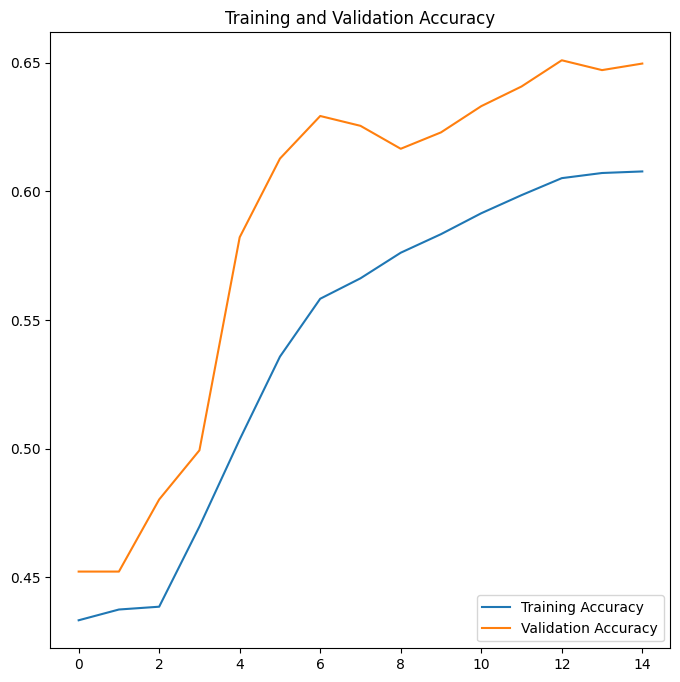

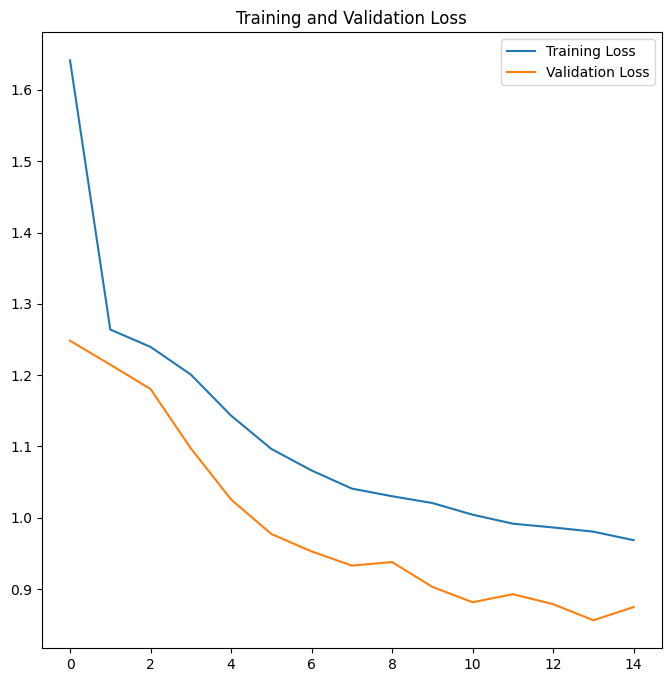

In [ ]:
loss_accuracy_curve(history1)

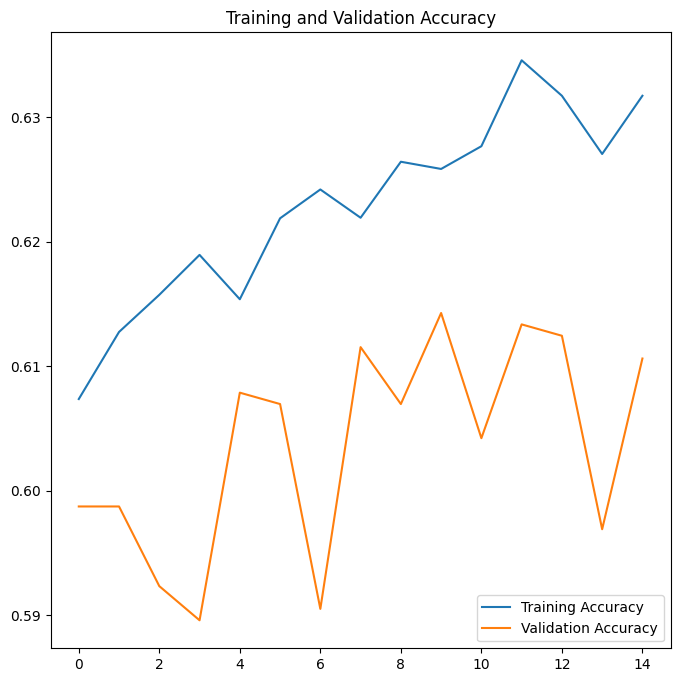

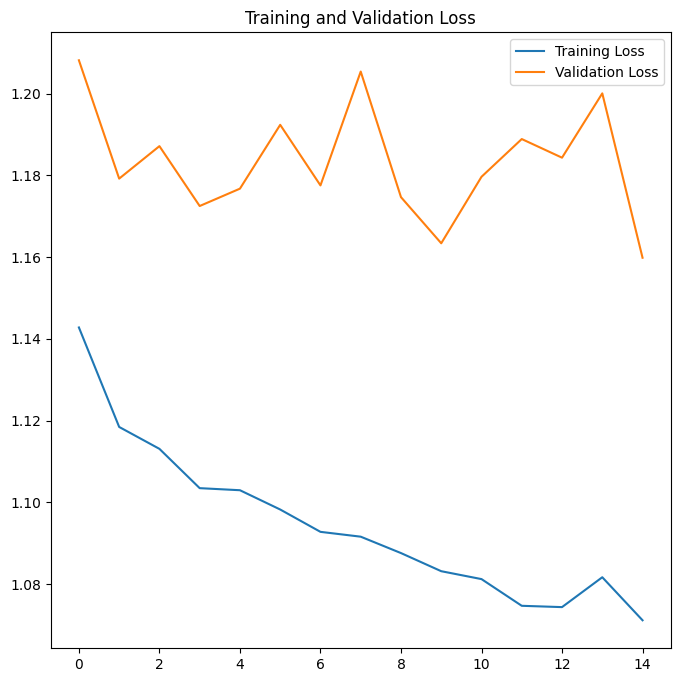

In [ ]:
loss_accuracy_curve(history)

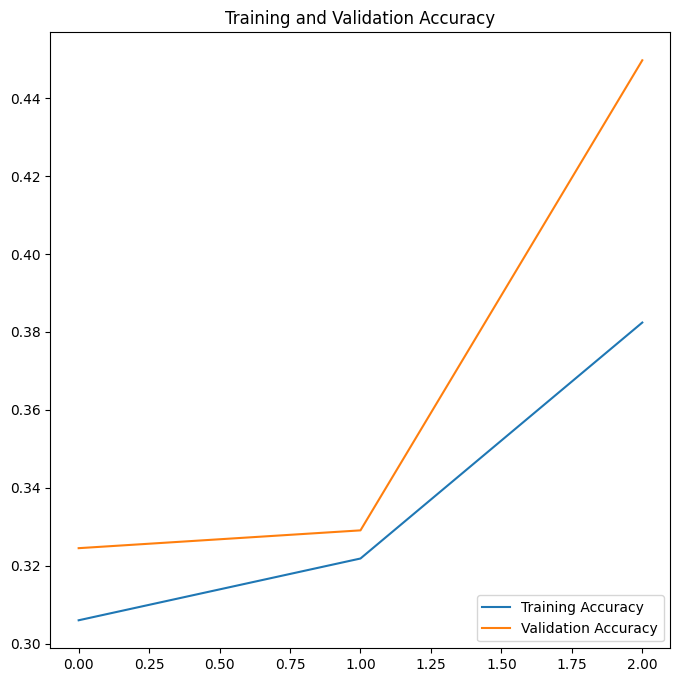

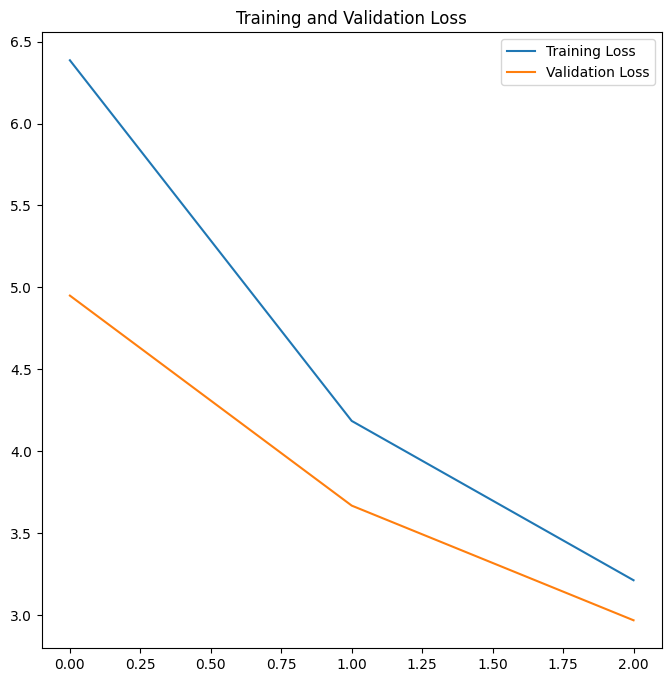

In [ ]:
loss_accuracy_curve(history3)

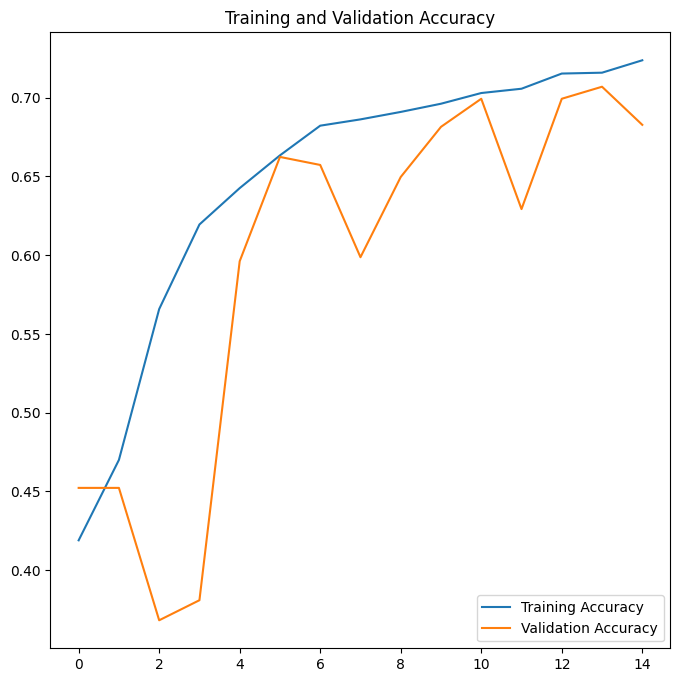

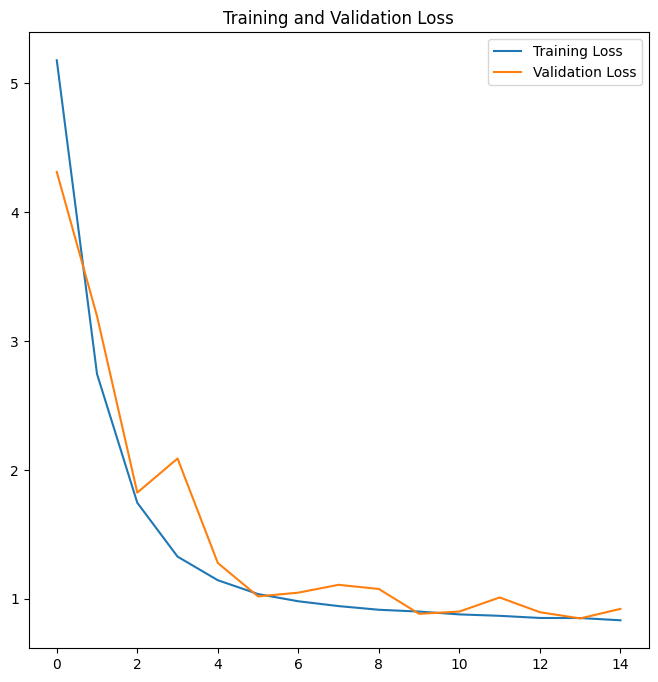

In [ ]:
loss_accuracy_curve(history30)

In [ ]:


model70.evaluate(X_test_new, y_test_new)

99/99 [==============================] - 1s 11ms/step - loss: 1.2293 - accuracy: 0.7020


[1.22929048538208, 0.7020395398139954]

In [ ]:
model_pred_probs = model70.predict(X_test_new)

99/99 [==============================] - 1s 8ms/step


In [ ]:
model_pred = model_pred_probs.argmax(axis = 1)
model_pred[:10]

array([1, 0, 1, 2, 0, 2, 2, 2, 2, 0])

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_true=y_test_new,
                 y_pred=model_pred)

array([[ 601,   29,  123,   13],
       [ 341,  252,  203,   23],
       [  63,   14, 1341,    1],
       [  71,   19,   35,    9]])

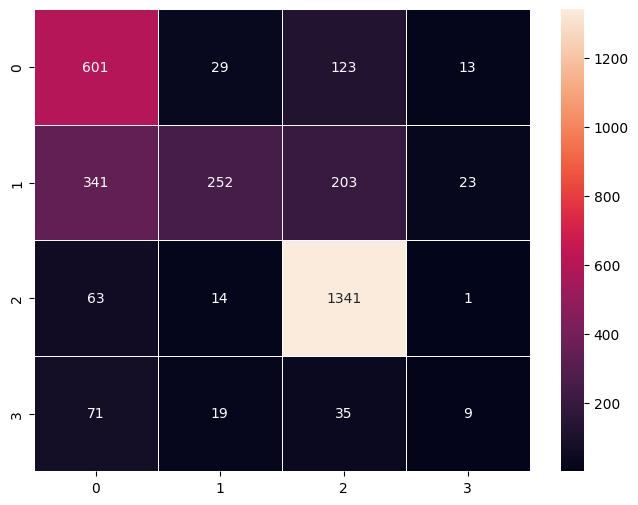

In [ ]:
# prettified confusion matrix
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_true=y_test_new,
                 y_pred=model_pred), annot = True, fmt = 'd', linewidth = 0.4)
plt.show()

In [ ]:

# recall, precision, f1-score
print(classification_report(y_true=y_test_new,
                 y_pred=model_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.78      0.65       766
         1.0       0.80      0.31      0.44       819
         2.0       0.79      0.95      0.86      1419
         3.0       0.20      0.07      0.10       134

    accuracy                           0.70      3138
   macro avg       0.59      0.53      0.51      3138
weighted avg       0.71      0.70      0.67      3138



In [ ]:
local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

SyntaxError: invalid syntax (<ipython-input-85-75e41a014cc2>, line 1)

In [ ]:
y_test_new.value_counts()

2.0    1419
1.0     819
0.0     766
3.0     134
Name: class, dtype: int64

In [ ]:
sub_train.sample(8)

,Emotion,Image_list,class
5751,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...,1.0
14201,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,2.0
7470,fearful,/content/drive/MyDrive/Facial Emotion/train/fe...,1.0
2543,angry,/content/drive/MyDrive/Facial Emotion/train/an...,0.0
14466,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,2.0
2111,angry,/content/drive/MyDrive/Facial Emotion/train/an...,0.0
9346,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,2.0
15164,happy,/content/drive/MyDrive/Facial Emotion/train/ha...,2.0


In [ ]:
class_dict = {'angry':0, 'disgusted':1, 'fearful':2, 'happy':3, 'neutral':4, 'sad':5, 'surprised':6}

In [ ]:
train_images_csv['Image_list']

In [ ]:
input_arr

array([[[[ 2.],
         [ 2.],
         [ 2.],
         ...,
         [ 1.],
         [ 2.],
         [ 1.]],

        [[ 2.],
         [ 2.],
         [ 2.],
         ...,
         [ 2.],
         [ 2.],
         [ 1.]],

        [[ 4.],
         [ 4.],
         [ 3.],
         ...,
         [ 2.],
         [ 3.],
         [ 2.]],

        ...,

        [[19.],
         [45.],
         [42.],
         ...,
         [31.],
         [32.],
         [37.]],

        [[ 4.],
         [38.],
         [44.],
         ...,
         [33.],
         [37.],
         [30.]],

        [[ 0.],
         [24.],
         [44.],
         ...,
         [31.],
         [17.],
         [14.]]]], dtype=float32)